<a href="https://colab.research.google.com/github/Sirczechs-Kaustubh/Ashte-fastapi/blob/main/blood_brain_barrierML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem

In [ ]:
m = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

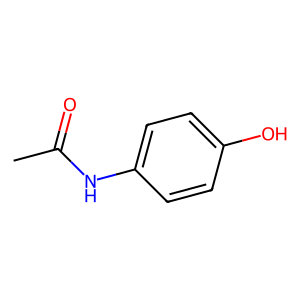

In [ ]:
from rdkit.Chem import Draw
img = Draw.MolToImage(m)
img

In [ ]:
m.GetNumAtoms()


11

In [ ]:
m2 = Chem.AddHs(m)
m2.GetNumAtoms()

20

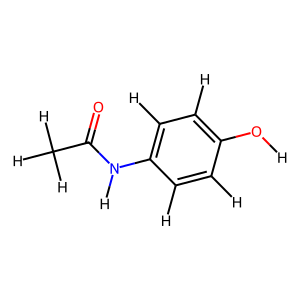

In [ ]:
img = Draw.MolToImage(m2)
img

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.MolWt(m)

151.165

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

mol1 = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O') # Paracetamol
mol2 = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C') # Caffeine
mol3 = Chem.MolFromSmiles('CN1C2=C(C(=O)N(C1=O)C)NC=N2') # Theophylline

fp1 = AllChem.GetMorganFingerprint(mol1, 4)
fp2 = AllChem.GetMorganFingerprint(mol2, 4)
fp3 = AllChem.GetMorganFingerprint(mol3, 4)

print(f"Para-Caff-{DataStructs.TanimotoSimilarity(fp1, fp2)}\nPara-Theo-{DataStructs.TanimotoSimilarity(fp1, fp3)}\nCaff-Theo-{DataStructs.TanimotoSimilarity(fp2, fp3)}")

Para-Caff-0.06172839506172839
Para-Theo-0.06329113924050633
Caff-Theo-0.3611111111111111


In [ ]:
print(mol2)

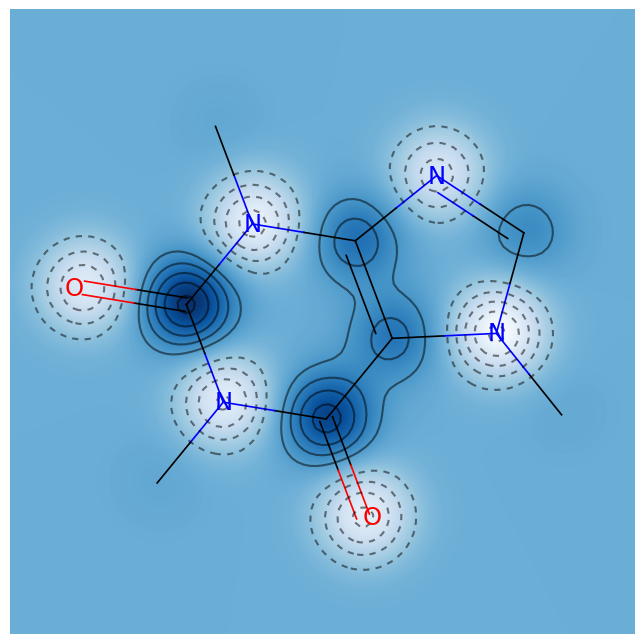

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

AllChem.ComputeGasteigerCharges(mol2)
contribs = [mol2.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol2.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol2, contribs, colorMap='Blues', contourLines=10)

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
#import rdkit.Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

In [ ]:
data_drug = pd.read_excel('/content/BBB_datasets.xlsx')

In [ ]:
data_drug.head()

,Drug Name,SMILES,Class
0,1,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...,BBB+
1,2,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4,BBB+
2,5,CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...,BBB+
3,11,ClCCCl,BBB+
4,120,c1cccc(c1C23C)C(N3)Cc4c2cccc4,BBB+


In [ ]:
smiles = data_drug['SMILES']
mol_descriptors = []

In [ ]:
data_drug['SMILES']

0      c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...
1        c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4
2      CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...
3                                                 ClCCCl
4                          c1cccc(c1C23C)C(N3)Cc4c2cccc4
                             ...                        
600    c1nc(C)nc(N)c1CN(C=O)C(\C)=C(SSC(C)C)\CCOC(=O)...
601                              Cc(c1)ccc(c1C)NC2=NCCN2
602                  OC[C@@H]1CC[C@H](O1)n(c(n2)=O)ccc2N
603          N=[N+]=NC(C1CO)CC(O1)n(c2)c(=O)[nH]c(=O)c2C
604      C1=CC(C)=CN(C12)C(CC(=O)N(C)C)=C(N2)c(cc3)ccc3C
Name: SMILES, Length: 605, dtype: object

In [ ]:
for i in data_drug['SMILES']:
    moler = Chem.MolFromSmiles(i)
    if True:
        try:
            calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
            vector = calc.CalcDescriptors(moler)
            mol_descriptors.append(vector)
        except:
            print(i)


Streaming output truncated to the last 5000 lines.
    rdkit.Chem.rdMolDescriptors.CalcChi2n(NoneType)
did not match C++ signature:
    CalcChi2n(RDKit::ROMol mol, bool force=False)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/usr/local/lib/python3.10/dist-packages/rdkit/Chem/GraphDescriptors.py", line 407, in <lambda>
    Chi2v = lambda x: rdMolDescriptors.CalcChi2v(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcChi2v(NoneType)
did not match C++ signature:
    CalcChi2v(RDKit::ROMol mol, bool force=False)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/usr/local/lib/python3.10/dist-packages/rdkit/Chem/GraphDescriptors.py", line 422, in <lambda>
    Chi3n = lambda x

In [ ]:
# create an array of the 200 mol descriptors
cols_mols = np.asarray(Descriptors._descList)

desc_df = pd.DataFrame(mol_descriptors, columns = cols_mols)


In [ ]:
desc_df.head()

,"(MaxEStateIndex, <function MaxEStateIndex at 0x7924ebf1d870>)","(MinEStateIndex, <function MinEStateIndex at 0x7924ebf1d900>)","(MaxAbsEStateIndex, <function MaxAbsEStateIndex at 0x7924ebf1d990>)","(MinAbsEStateIndex, <function MinAbsEStateIndex at 0x7924ebf1da20>)","(qed, <function qed at 0x7924ebf68a60>)","(MolWt, <function <lambda> at 0x7924ebf68d30>)","(HeavyAtomMolWt, <function HeavyAtomMolWt at 0x7924ebf68dc0>)","(ExactMolWt, <function <lambda> at 0x7924ebf68e50>)","(NumValenceElectrons, <function NumValenceElectrons at 0x7924ebf68ee0>)","(NumRadicalElectrons, <function NumRadicalElectrons at 0x7924ebf68f70>)",...,"(fr_sulfide, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf82b00>)","(fr_sulfonamd, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf82dd0>)","(fr_sulfone, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf82d40>)","(fr_term_acetylene, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf83010>)","(fr_tetrazole, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf836d0>)","(fr_thiazole, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf83250>)","(fr_thiocyan, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf82950>)","(fr_thiophene, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf831c0>)","(fr_unbrch_alkane, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf83910>)","(fr_urea, <function _LoadPatterns.<locals>.<lambda> at 0x7924ebf82f80>)"
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_drug.head()

,Drug Name,SMILES,Class
0,1,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...,BBB+
1,2,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4,BBB+
2,5,CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...,BBB+
3,11,ClCCCl,BBB+
4,120,c1cccc(c1C23C)C(N3)Cc4c2cccc4,BBB+


In [ ]:
desc_df.columns

Index([                    ('MaxEStateIndex', <function MaxEStateIndex at 0x7924ebf1d870>),
                           ('MinEStateIndex', <function MinEStateIndex at 0x7924ebf1d900>),
                     ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7924ebf1d990>),
                     ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7924ebf1da20>),
                                                 ('qed', <function qed at 0x7924ebf68a60>),
                                          ('MolWt', <function <lambda> at 0x7924ebf68d30>),
                           ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x7924ebf68dc0>),
                                     ('ExactMolWt', <function <lambda> at 0x7924ebf68e50>),
                 ('NumValenceElectrons', <function NumValenceElectrons at 0x7924ebf68ee0>),
                 ('NumRadicalElectrons', <function NumRadicalElectrons at 0x7924ebf68f70>),
       ...
              ('fr_sulfide', <function _LoadPatterns.<locals>.<lambda

In [ ]:
# Get the current column names
old_names = desc_df.columns.tolist()

# Create a dictionary mapping old names to new names
new_names = {old: str(i) for i, old in enumerate(old_names)}

# Rename the columns
desc_df.rename(columns=new_names, inplace=True)


In [ ]:
desc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_drug["Class"].unique()

array(['BBB+', 'BBB-'], dtype=object)

In [ ]:
desc_df["Label"] = data_drug["Class"].map({'BBB+': 1, 'BBB-': 0})

In [ ]:
desc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,Label
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,1
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,1
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,1
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,1
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
desc_df.isna().sum().sum()

24

In [ ]:
desc_df=desc_df.dropna()

In [ ]:
desc_df.isna().sum().sum()

0

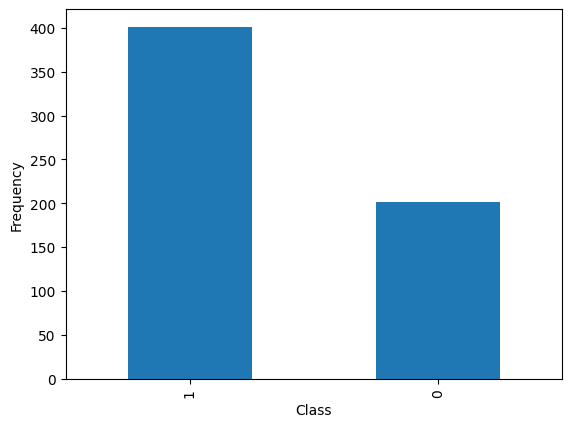

In [ ]:
import matplotlib.pyplot as plt

desc_df['Label'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Theres a class imbalance
# 400 positive labels and 200 Negative labels

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef


In [ ]:
from sklearn.svm import SVC
X = desc_df.drop('Label', axis=1)
y = desc_df['Label']

# Define random state for reproducibility
random_state = 410

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=random_state)

# Fit and apply the transform
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Create a pipeline with a standard scaler
pipeline = make_pipeline(StandardScaler(),SVC(gamma="auto",random_state=random_state))

# Fit the pipeline to the resampled data
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=410))])

In [ ]:
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_pred,y_test,pos_label=1)
accuracy = accuracy_score(y_pred,y_test)


<Figure size 800x800 with 0 Axes>

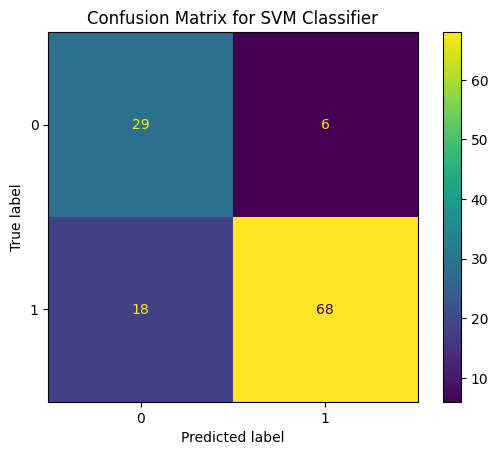

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

In [ ]:
print(f"Accuracy using SVM {accuracy}\nF1 Score of SVM {f1}")


Accuracy using SVM 0.8016528925619835
F1 Score of SVM 0.85
